#### **Deep & Reinforcement Learning**

#### **Observações**

##### Classificando diferentes tipos de semente de abóbora 🎃🌱

As sementes de abóbora são frequentemente consumidas como confeitos em todo o mundo devido à sua quantidade adequada de proteínas, gorduras, carboidratos e teores minerais. A base de dados **"SementesAbobora.xlsx"** possui um estudo foi realizado nos dois tipos de sementes de abóbora mais importantes e de qualidade, **“Ürgüp Sivrisi”** e **“Çerçevelik”**, geralmente cultivadas nas regiões de Ürgüp e Karacaören na Turquia.

Muitas espécies de sementes têm semelhanças visuais, o que torna a classificação manual difícil e sujeita a erros. Redes neurais podem ser treinadas para identificar padrões que não são facilmente perceptíveis pelo olho humano, aumentando a precisão da classificação.

Imagine que foi proposto para você o desafio de criar uma **inteligência para identificar os tipos de sementes para ajudar a equipe de engenheiros e engenheiras Agrícolas**. Para trabalhar com a precisão dos resultados x complexidade das características de sementes, você optou em utilizar as **redes neurais multilayer perceptron**. Vamos para a aplicação?

**Features**

- Perímetro
- Maior_Eixo_Comprimento
- Comprimento_Eixo_Menor
- Área_Convexa
- Equiv_Diâmetro
- Excentricidade
- Solidez
- Extensão
- Redondeza
- Proporcao
- Compacidade

**Target**
Classes:
 ((A)Çerçevelik, (B)Ürgüp Sivrisi)

##### Classificando cães 🐕 e gatos 🐈

Você já imaginou criar uma rede neural para classificar imagens? As redes neurais convolucionais (CNNs) são amplamente utilizadas em uma variedade de aplicações de visão computacional e processamento de imagens devido à sua capacidade de aprender representações hierárquicas de dados.

Na aula de hoje vamos criar uma rede neural para classificar cães e gatos. Sabemos que para os olhos humanos é fácil a identificação dos animais por meio de algumas diferenças entre ambos, tal como gatos possuem os olhos mais puxadinhos, orelhinhas mais pontudas e entre outras características. Mas também sabemos que temos cães que podem ter características semelhantes ao gato, tal como a orelhinha pontuda, cauda longa, e entre outras características. Será que a rede neural consegue distinguir os animais? Vamos codar e descobrir juntos!!

##### Como criar ambientes para evitar conflito:  
https://github.com/RicardViana/fiap-data-viz-and-production-models/blob/main/Roteiro%20para%20cria%C3%A7%C3%A3o%20de%20ambiente.pdf

#### **Conteúdo - Bases e Notebook da aula**

Github:  
https://github.com/FIAP/Pos_TecDTAT/tree/DeepLearning

#### **Importação de bibliotecas**

In [69]:
#Importar biblioteca completa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2
import gdown
import config

#Importar algo especifico de uma biblioteca
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from pathlib import Path
from distutils.file_util import copy_file
from keras.layers import Input


#### **Funções (def)**

#### **Aula 1 - Perceptron de múltiplas camadas**

In [2]:
#Importar base de dados

link = 'https://github.com/RicardViana/fiap-Deep-Learning-and-unstructured-data/raw/refs/heads/main/SementesAbobora.xlsx'
df = pd.read_excel(link)

In [3]:
#Ver os primeiros dados

df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [4]:
#Ver os ultimos dados

df.tail()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,(B) Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,(B) Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,(B) Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,(B) Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,(B) Ürgüp Sivrisi


In [5]:
#Ver a qtd de linhas e colunas da data frame
df.shape

(2500, 13)

In [6]:
#Como a base de dados possui os dados de classes de forma ordenada, isso pode ser um problema para o aprendizado de máquina e dessa forma é preciso embaralhar os dados com o comando shuffle.

'''

Se o que você quer prever é uma categoria (nome, grupo, "sim/não"), você está lidando com Classes.

Se o que você quer prever é um número contínuo (preço de uma casa, temperatura, valor do dólar), você está lidando com Regressão.

'''

df = shuffle(df)

In [7]:
#Verificar os dados embaralhados
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2148,82318,1195.483,507.8251,206.8698,83200,323.7445,0.9133,0.9894,0.7343,0.7238,2.4548,0.6375,(B) Ürgüp Sivrisi
189,95497,1199.376,472.5344,258.6676,96748,348.6984,0.8369,0.9871,0.7387,0.8342,1.8268,0.7379,(A) Çerçevelik
938,82487,1103.065,429.3590,246.2547,83544,324.0767,0.8192,0.9873,0.7300,0.8519,1.7436,0.7548,(A) Çerçevelik
1199,75035,1092.214,439.5387,218.7103,75771,309.0915,0.8674,0.9903,0.6043,0.7904,2.0097,0.7032,(A) Çerçevelik
1702,106232,1349.849,577.2489,234.7997,107137,367.7755,0.9135,0.9916,0.7379,0.7326,2.4585,0.6371,(B) Ürgüp Sivrisi


In [8]:
#Ver o equilibrio da base de dados
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

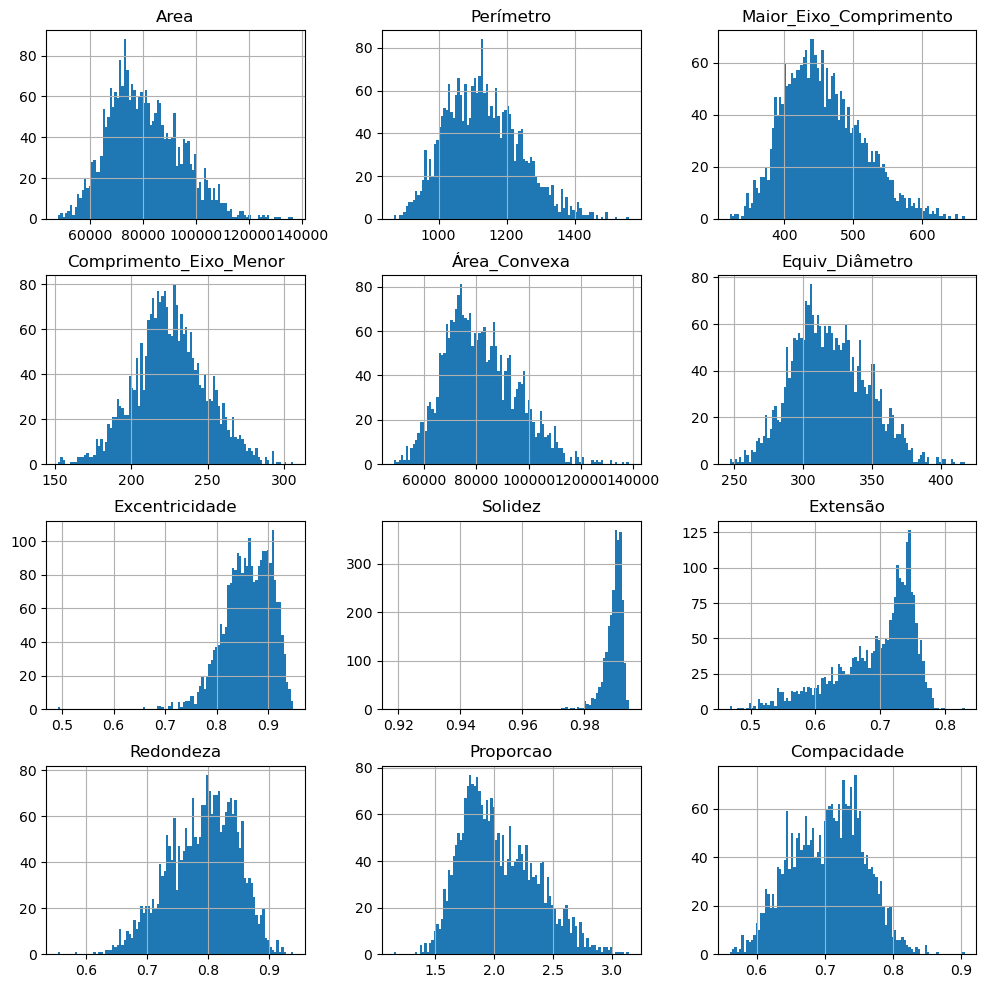

In [9]:
#Potando histogramas para analisar a simetria dos dados
df.hist(bins=100, figsize=(12, 12))
plt.show()

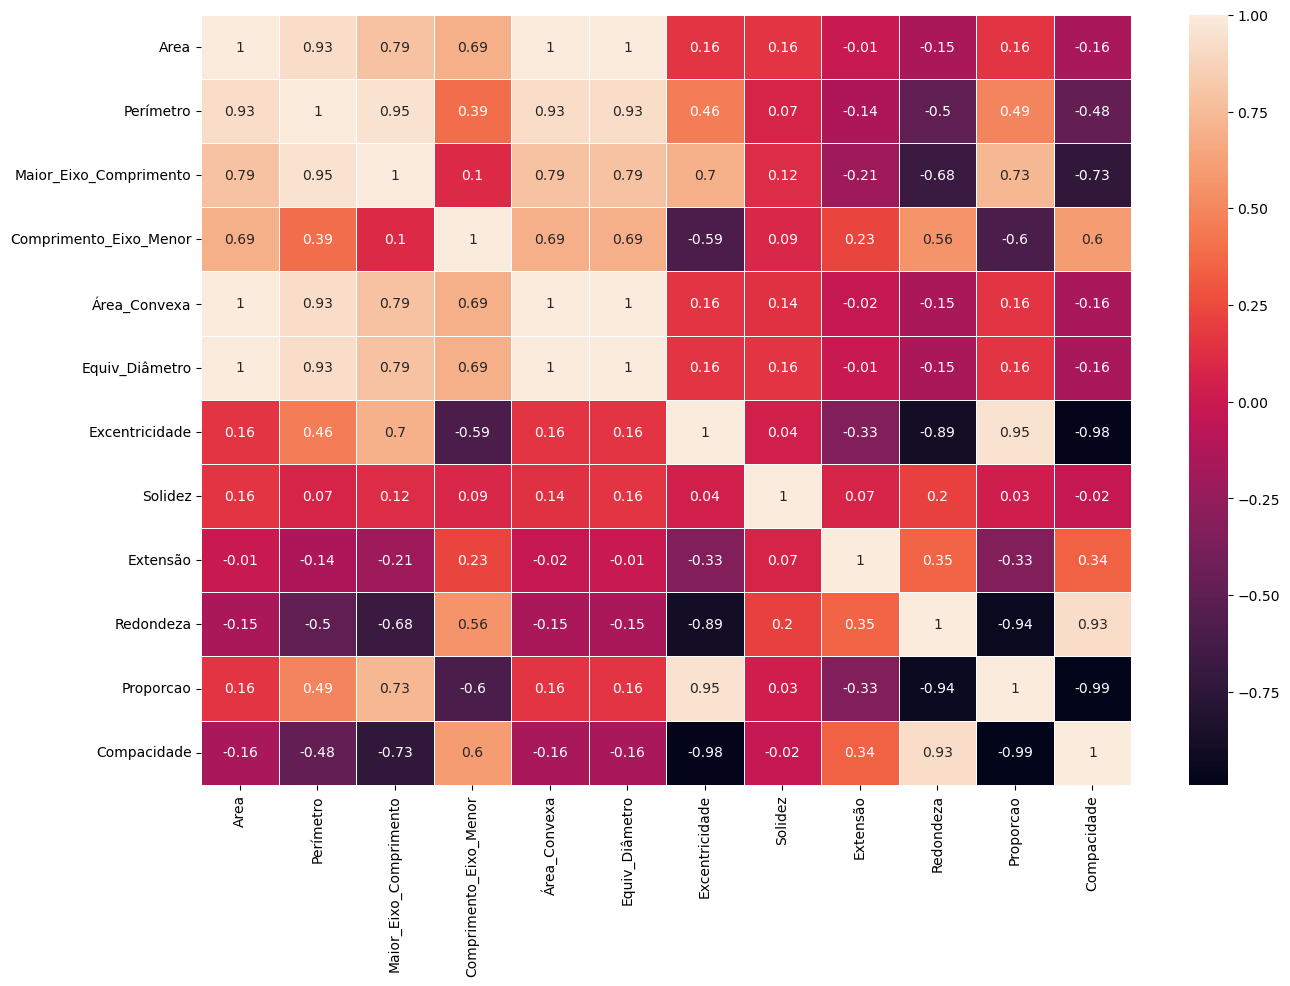

In [10]:
#Verificar a correlação dos dados
correlation_matrix = df.select_dtypes(include='number').corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [11]:
#Ver a info dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 2148 to 1375
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   int64  
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   int64  
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 273.4+ KB


In [12]:
# Utilizando LabelEncoder para transformar/converter rótulos de texto em números referente a variavel target
le = LabelEncoder()

# Sobrescrever a coluna Class
df.Class = le.fit_transform(df['Class'])

In [13]:
# Verificar apenas os dados distitos
set(df['Class'])

{0, 1}

In [14]:
# Separar os dados 
X = df[['Area','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

In [15]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
# Pré-processamento dos dados

'''

Apesar de deep learning não requerer distribuições normais, é comum aplicar técnicas de pré-processamento de dados para normalizar ou padronizar as características. 
Isso pode ajudar a acelerar a convergência do treinamento da rede neural.
A convergência está relacionada com o erro, ou seja, o quanto a sua rede aprende a corrigir os erros durante o processamento.

'''

# Ajustar os dados (Fit)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

,copy,True
,with_mean,True
,with_std,True


In [17]:
# Transformar os dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Ver os dados de treino
X_train

array([[ 1.96480052,  1.55222272,  1.50128508, ...,  0.04881883,
        -0.0485385 , -0.05251099],
       [-0.86478894, -1.18002563, -0.09283386, ...,  1.26662724,
        -0.86380925,  0.88005114],
       [-1.11082404, -1.2978274 , -0.35659397, ...,  0.92996935,
        -0.82241716,  0.81001683],
       ...,
       [ 0.25221489,  0.33378027,  0.16134176, ..., -0.28440378,
         0.0547884 , -0.22575376],
       [-1.43480866, -1.44829987, -0.97482451, ...,  0.437006  ,
        -0.46613864,  0.38796796],
       [ 0.80499505,  0.92927053,  0.14070133, ..., -0.60216761,
         0.60055069, -0.70309287]], shape=(2000, 9))

In [19]:
# Ver a quantidade de linhas e colunas da base de treino
X_train.shape

(2000, 9)

In [20]:
# Ver o tipo do dado
type(X_train)

numpy.ndarray

In [21]:
# Ver a quantidade de linhas e colunas da base de teste
X_test.shape

(500, 9)

In [22]:
# Ver o tipo do dado
type(X_test)

numpy.ndarray

In [23]:
#Moldando nossas variáveis resposta

'''

A nossas classes estão em um formato de estrutura de dados unidimensional (assim como uma coluna) e precisamos moldar para o formato de array -n dimensional(matriz).
O comando reshape é utilizado para reformatar a estrutura de um array multidimensional, como um tensor, que é a estrutura de dados fundamental usada em deep learning e processamento de dados em redes neurais.

'''

# Ver o tipo do dado
type(y_train)

pandas.core.series.Series

In [24]:
# reshape() molda uma matriz sem alterar os dados da matriz

'''

O que o .reshape((-1, 1)) faz?

Imagine que os dados originais sejam uma lista simples: [0, 1, 0, 1] e para o Python, isso é um vetor de uma única dimensão (1D). 
No entanto, bibliotecas como o TensorFlow ou Scikit-Learn geralmente exigem que os dados de entrada tenham duas dimensões: uma para as linhas (amostras) e outra para as colunas (características).

* O número 1: Diz ao NumPy que queremos que o resultado final tenha exatamente 1 coluna.
* O número -1: Esse é um "coringa". Ele diz ao NumPy: "Calcule automaticamente quantas linhas são necessárias para que todos os dados caibam nessa 1 coluna".

O passo a passo da linha inteira

O comando abaixoé uma "super instrução" que faz três coisas:

1. np.asarray(y_train): Garante que o dado seja um array do NumPy (caso ele venha de uma lista ou de uma coluna do Pandas).
2. .astype('float32'): Converte os números para o formato de ponto flutuante de 32 bits. Computacionalmente, as GPUs e CPUs processam cálculos de Redes Neurais muito mais rápido em float32 do que em números inteiros ou float64.
3. .reshape((-1, 1)): Transforma o vetor de "deitado" (1D) para "em pé" (2D), como uma coluna de uma tabela.

Por que isso é necessário?

A maioria dos modelos de Deep Learning (como os do Keras/TensorFlow) espera que o seu `y` (o que você quer prever) tenha o formato (número_de_amostras, número_de_saídas).

Mesmo que você só tenha uma saída (0 ou 1), o modelo espera que essa saída esteja dentro de uma estrutura de "coluna", e não apenas uma lista solta.

'''

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [25]:
# Ver o tipo do dado após o reshape
type(y_train)

numpy.ndarray

In [26]:
# Ver a qtd de linhas e colunas
y_train.shape

(2000, 1)

In [27]:
# Semente aleatória para reprodutibilidade
tf.random.set_seed(7)

# Definindo dimensões
input_dim = X_train.shape[1] 
output_dim = y_train.shape[1]
batch_size = 20

# Abrindo a sequência do modelo
model = models.Sequential()

# Definindo a camada de entrada explicitamente
model.add(layers.Input(shape=(input_dim,)))

# Camada densa inicial (agora sem o parâmetro input_shape)
model.add(layers.Dense(batch_size, activation='relu'))

# Camadas ocultas
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(6, activation='relu'))

# Regularização
model.add(layers.Dropout(0.5))

# Camada de saída
# Usamos sigmoid porque é uma classificação binária (0 ou 1)
model.add(layers.Dense(output_dim, activation='sigmoid'))

# Configuração do otimizador e compilação
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# Visualizar a arquitetura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Executar as épocas de processamento para a rede treinar e encontrar o menor erro
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


0epoch [00:00, ?epoch/s]

In [29]:
# Plotar a acurácia
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 81.05% com 100 epochs de processamento


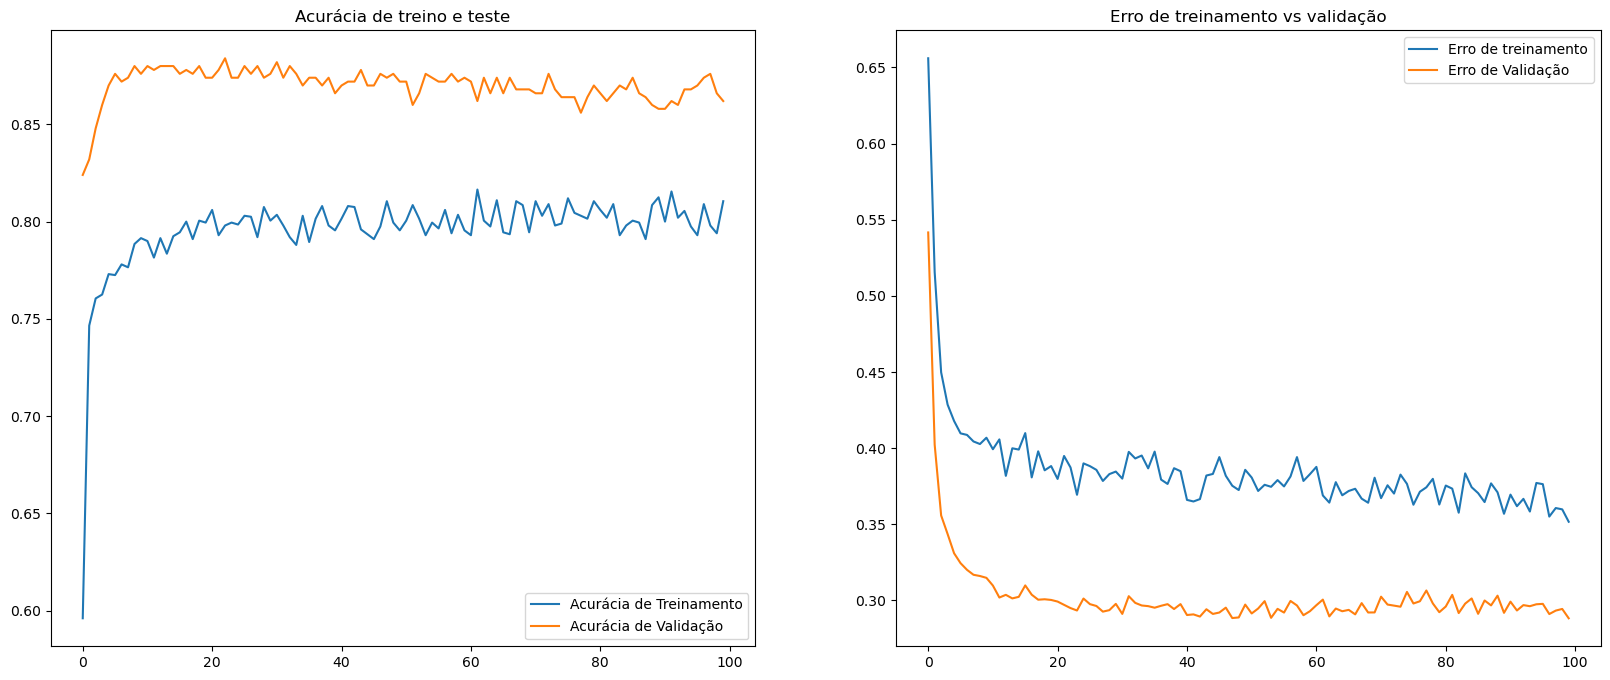

In [30]:
# Validar o modelo

'''

É muito importante comparar a performance do modelo tanto na base de treinamento quanto de validação. 
Para isso vamos plotar dois gráficos para acompanhar a performance do modelo pelas épocas de processamento.

'''

# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [31]:
# Gerar o report

# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.89      0.85      0.87       268
  (A) Çerçevelik        0.84      0.88      0.85       232

         accuracy                           0.86       500
        macro avg       0.86      0.86      0.86       500
     weighted avg       0.86      0.86      0.86       500



#### **Aula 2 - Redes convolucionais**

In [32]:
# Em vez de montar o drive, lemos o caminho do nosso arquivo de configuração
caminho_da_pasta = config.DATA_PATH
pasta_imagens = Path(caminho_da_pasta)

# Listando todas as imagens do diretório (o seu código original)
filepaths = list(pasta_imagens.glob(r'**/*.jpg'))

# Verificação para garantir que os arquivos foram carregados
if filepaths:
    print(f"Sucesso! Foram encontradas {len(filepaths)} imagens.")
    print(f"Primeira imagem: {filepaths[0]}")
else:
    print("Erro: Nenhuma imagem encontrada. Verifique o caminho no seu arquivo config.py")

Sucesso! Foram encontradas 1400 imagens.
Primeira imagem: C:\Users\ricar\OneDrive\Cursos\Pós Graduação\Data Analytics - FIAP\07 - Fase 5 - Deep Learning and Unstructured Data\02 - Deep & Reinforcement Learning\Outros\cat_dog_imagens\cachorinho\dog.0.jpg


In [33]:
# Inicializando rótulos e listas de imagens para armazenar os dados
labels = [] #armazenando as variáveis target
images = [] #armazenando imagens

# Definindo o tamanho da dimensão da imagem
image_size = 64

# Um loop for para definir as variáveis x e y para os modelos
for filepath in filepaths:

    try:
        
        # Tratar caminho com espaço e acento
        img_array = np.fromfile(str(filepath), np.uint8)

        # Obtem a imagem do caminho com cv2
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

        # Verificação de segurança
        if img is None:
            print(f"⚠️ Arquivo ignorado (não é uma imagem válida): {filepath}")
            continue
            
        # Divide o nome do caminho para extrair o cabeçalho do caminho com split
        head = os.path.split(filepath)

        # Divide o cabeçalho do caminho anterior para extrair o nome do animal
        animal = os.path.split(head[0])

        # Armazena o nome do animal na lista de labels
        labels.append(animal[1])
        
        # Redimensiona a imagem e normalize o intervalo de pixels para ficar entre 0 e 1 (padronização)
        # Utilizando float32 para criar uma precisão limitada (menor demanda de memória em comparação com tipos de ponto flutuante de maior precisão: float64)
        img = cv2.resize(img, (image_size, image_size)).astype('float32') / 255.0

        # Adiciona a imagem na lista de imagens
        images.append(img)
        
    except Exception as e:
        print(f"❌ Erro crítico ao processar {filepath}: {e}")

# Converte a imagem em lista de array
images = np.array(images)

# Converte as labels para lista de array
labels = np.array(labels)

In [34]:
# Consulta o shape da imagem
images.shape

(1400, 64, 64, 3)

In [35]:
# Consultar a lista de array
images

array([[[[0.49411765, 0.44313726, 0.4509804 ],
         [0.5921569 , 0.56078434, 0.5647059 ],
         [0.64705884, 0.6313726 , 0.627451  ],
         ...,
         [0.6509804 , 0.6039216 , 0.59607846],
         [0.6       , 0.5529412 , 0.54509807],
         [0.5803922 , 0.53333336, 0.5254902 ]],

        [[0.5137255 , 0.4627451 , 0.47058824],
         [0.6       , 0.5686275 , 0.57254905],
         [0.64705884, 0.627451  , 0.62352943],
         ...,
         [0.65882355, 0.6117647 , 0.6039216 ],
         [0.63529414, 0.5882353 , 0.5803922 ],
         [0.6       , 0.5529412 , 0.54509807]],

        [[0.53333336, 0.48235294, 0.49019608],
         [0.6       , 0.5686275 , 0.57254905],
         [0.67058825, 0.6509804 , 0.64705884],
         ...,
         [0.6745098 , 0.627451  , 0.61960787],
         [0.63529414, 0.5882353 , 0.5803922 ],
         [0.61960787, 0.57254905, 0.5647059 ]],

        ...,

        [[0.81960785, 0.54509807, 0.5764706 ],
         [0.47058824, 0.33333334, 0.40784314]

In [36]:
# Consultar a lista de array
labels

array(['cachorinho', 'cachorinho', 'cachorinho', ..., 'gatinho',
       'gatinho', 'gatinho'], shape=(1400,), dtype='<U10')

In [37]:
# Construir o data frame

'''

Com as imagens e rotulos já definidos, vamos construir um dataframe com o nome do caminho e o rótulo da imagem.

'''

# Salvando a lista de caminhos de arquivo
pd_filepaths = pd.Series(filepaths, name='Filepath').astype(str)

In [38]:
# Salvando a lista de caminhos de arquivo
pd_filepaths = pd.Series(filepaths, name='Filepath').astype(str)

In [39]:
# Visualizando o camiho das imagens
print(pd_filepaths[:3])

0    C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...
1    C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...
2    C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...
Name: Filepath, dtype: object


In [40]:
# Visualizando os rótulos das imagens
print(labels[:3])

['cachorinho' 'cachorinho' 'cachorinho']


In [41]:
# Adicionando a label
pd_labels = pd.Series(labels, name='Label')

In [42]:
# Concatenando the filepaths and labels
df = pd.concat([pd_filepaths, pd_labels], axis=1)

In [43]:
# Consultando o data frame com o head
df.head()

,Filepath,Label
0,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
1,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
2,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
3,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
4,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho


In [44]:
# Consultando o data frame com o head
df.tail()

,Filepath,Label
1395,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
1396,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
1397,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
1398,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
1399,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho


In [46]:
# Embaralhando o dataframe

'''

Como dados estão em ordem das classes, isso pode ser um problema para o modelo, então vamos utilizar o sample para embaralhar o dataframe:

'''

df = df.sample(frac=1).reset_index(drop = True)

In [47]:
# Consultando o data frame com o head
df.head()

,Filepath,Label
0,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
1,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
2,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,gatinho
3,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho
4,C:\Users\ricar\OneDrive\Cursos\Pós Graduação\D...,cachorinho


In [48]:
# Cria uma cópia do dataframe com apenas uma imagem de cada animal
# Subset está procurando por duplicatas apenas na coluna chamada 'Label' e removendo todas as duplicatas encontradas.
df_singles = df.copy().drop_duplicates(subset=('Label')).reset_index() 

In [ ]:
# Fazer uma contagem
len(df_singles)

2

In [51]:
# Define o número de classes
num_classes = df_singles.shape[0]

In [52]:
# Verificar o numero de classes
num_classes

2

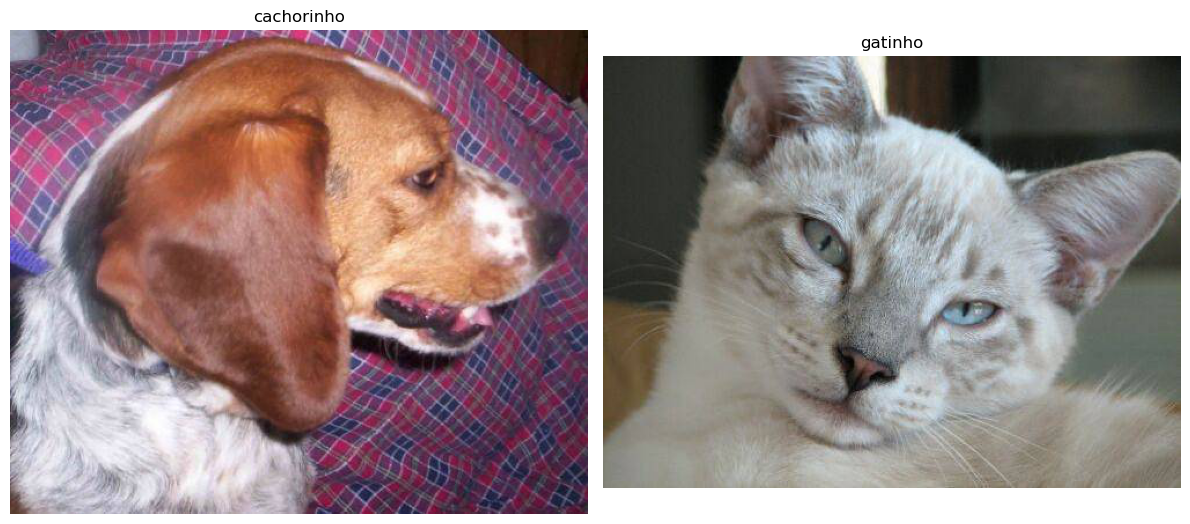

In [ ]:
'''

Agora que temos as classes mapeadas na variável num_classes, vamos visualizar duas amostras de imagens dentro do dataset:

'''

# Configura o número de linhas e colunas para visualizar os dados no plot
ROW = 1
COLUMN = 2

# Dimensões das imagens
plt.figure(figsize=(12, 9))
#Loop para cada animal
for i in range(num_classes):
    # Defina uma variável de imagem local para i imagem no dataframe de singles
    image = df_singles.Filepath[i]
    # Define a posição da imagem a ser plotada
    plt.subplot(ROW, COLUMN, i+1)
    # Mostra a imagem
    plt.imshow(plt.imread(image))
    # Adiciona o rótulo do bichinho que corresponde à imagem
    plt.title('{}'.format(df_singles.Label[i]))
    # Desliga o eixo de plotagem
    plt.axis('off')
    # Faça com que o preenchimento ao redor das imagens seja mínimo
    plt.tight_layout()
plt.show()


In [54]:
# Separar em treino e teste a base de dados

'''

Agora com as imagens e classes organizadas, podemos aplicar o train_test_split para separar as bases de treinamento e teste: 

'''

x_train, x_test, y_train, y_test = train_test_split(images,labels, test_size=0.2, stratify=labels, random_state=44)

In [ ]:
# Analisando a dimensão dos dados --> x_train
x_train.shape

(1120, 64, 64, 3)

In [ ]:
# Analisando a dimensão dos dados --> x_test
x_test.shape

(280, 64, 64, 3)

In [57]:
'''

As imagens são basicamente uma matriz de pixels e para colocar as imagens dentro da arquitetura das redes convolucionais, é preciso "achatar" essas matrizes multidimensionais em vetores unidimensionais. 
Uma das camadas da rede, a Flatten(), é uma das partes da rede que achata os dados antes de entrar nas camadas densas.

'''

# Achatar os dados de teste e treinamento
x_train_flat = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2]* x_train.shape[3])
x_test_flat = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3])

In [58]:
# Visualizando a transformação
x_train_flat.shape

(1120, 12288)

In [59]:
'''

Como próximo passo, vamos converter as classes de texto em binárias. Para esse procedimento, vamos utilizar o método LabelEncoder().

'''

# Converter Strings em Numéricos
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Converte um vetor de classe (inteiros) em uma matriz de classe categórica.
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
'''

Vamos configurar agora como próximo passo o ModelCheckpoint para usar os melhores pesos para este modelo. 
Um dos benefícios do ModelCheckpoint é salvar uma cópia do modelo em disco em intervalos regulares (como após cada época de processamento) para que você possa retomar o treinamento 
a partir do ponto em que parou, minimizando perdas de tempo e recursos computacionais.

'''

# Defina um objeto ModelCheckpoint para usar os melhores pesos para este modelo
#checkpointer = ModelCheckpoint(filepath="weights.best.keras", verbose=0, save_best_only=True) --> Modelo aula

# Definimos o nome do ficheiro
nome_arquivo = "weights.best.keras"

# Criamos o checkpointer
checkpointer = ModelCheckpoint(
    filepath=nome_arquivo,
    monitor='val_accuracy', 
    verbose=1,               
    save_best_only=True,
    mode='max'               
)

print(f"✅ O modelo será monitorizado e salvo em: {os.path.abspath(nome_arquivo)}")


✅ O modelo será monitorizado e salvo em: c:\Users\ricar\OneDrive\Cursos\Pós Graduação\Data Analytics - FIAP\07 - Fase 5 - Deep Learning and Unstructured Data\weights.best.keras


In [ ]:
'''

Como próximo passo, vamos definir a entrada da rede e armazenar na variável

input_shape e em seguida configurar a learning rate e a queda do peso do otimizador com **weight_decay**.

O argumento weight_decay é usado para aplicar regularização L2 (também conhecida como regularização de peso) às camadas densas (fully connected) de uma rede neural durante o treinamento. 
A regularização L2 funciona adicionando um termo à função de perda durante o treinamento que penaliza os pesos maiores.

'''

# Define a forma de entrada das imagens passadas pelo modelo
input_shape = (image_size, image_size, 3)

# Defina a taxa de aprendizado e a queda de peso para o otimizador usar
learning_rate = 0.001

In [72]:
# Gerar a rede neural convolucional

# Defindo uma semente aleatória para utilizar sempre os mesmos dados durante nossos testes
tf.random.set_seed(44)

# Abrindo a sequencia do modelo
model = Sequential()

# Camada de entrada explícita
model.add(Input(shape=input_shape))

# 1 camada convolucional com 128 neurônios | filtro utilizando uma matriz 3x3 sendo movimentado por um stride de 2
# padding ativado (sem bordas de zeros) | função de ativação ReLU | regularização L2 ativada
model.add(Conv2D(128,
                 kernel_size=(3, 3),
                 strides=(2, 2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001)))

# Camada de MaxPolling ativada, com uma matriz 2x2. Padding ativado
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

# Regularização de dropout ativada
model.add(Dropout(0.5))

# 2 camada convolucional com 92 neurônios | filtro utilizando uma matriz 3x3 sendo movimentado por um stride de 2
# padding ativado (sem bordas de zeros) | função de ativação ReLU | regularização L2 ativada
model.add(Conv2D(92,
                 kernel_size=(3, 3),
                 strides=(2, 2),
                 padding='same',
                 activation='relu',
                 kernel_regularizer=keras.regularizers.l2(0.001)))

# Camada de MaxPolling ativada, com uma matriz 2x2. Padding ativado
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))

# Regularização de dropout ativada
model.add(Dropout(0.5))

# Camada que achata dos dados da imagem
model.add(Flatten())

# Camada Dense da rede neural convolucional + função de ativação ReLU
model.add(Dense(256, activation='relu'))

# Camada de saída da rede, utilizando a função de ativação softmax para criar a probabilidade de pertencimento das classes
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

# Visualizar resumo
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 92)       │       106,076 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 92)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 92)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       377,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487,262 (1.86 MB)

 Trainable params: 487,262 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''

Vamos configurar uma técnica de validação do modelo para evitar que as épocas de processamento não executem o modelo sem ter melhoras significativas, o early stopping. 
Essa técnica monitora a perda no conjunto de validação e interrompe o treinamento se a perda não diminuir significativamente por um número especificado de épocas (10 no exemplo)
após uma pequena melhoria (mínimo delta de 1e-5). Essa é uma técnica útil para evitar o overfitting e economizar tempo de treinamento. 
Podemos dizer que essa técnica ajuda o modelo a não ficar "estagnado", ou seja, se encontra em estado estacionário

Além da configuração do early stopping, vamos configurar a função de custo com o Adam. 
A função de custo tem o papel de ajustar os pesos de uma rede neural durante o treinamento. 
o Adam também utiliza um termo de momentum para acelerar o processo de aprendizado. 
O momentum ajuda o algoritmo a superar regiões planas ou mínimos locais rasos, permitindo que ele "ganhe velocidade" na direção do mínimo global. 
O otimizador Adam requer menos configuração de hiperparâmetro da taxa de aprendizagem, então um valor padrão n = 0,001 pode ser uma boa opção!

Lembrando que a taxa de aprendizagem (learning rate) é responsável por controlar o tamanho dos “passos” das interações para encontrar um melhor mínimo local (menor erro). 
Uma taxa de aprendizagem baixa pode ser mais precisa, porém pode demorar para encontrar o mínimo local. Uma taxa de aprendizado alta pode deixar passar o melhor mínimo local.

'''

#### **Aula 3 - Transferência de aprendizagem**

#### **Aula 4 - Redes recorrentes**

#### **Aula 5 - Redes não supervisionadas**

#### **Aula 6 - Gans**